In [12]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
# Read the City and Ride Data
city_data = pd.read_csv("../UTB/city_data.csv")
ride_data = pd.read_csv("../UTB/ride_data.csv")

city_data = city_data.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
# Display the data table for preview
combined_data = pd.merge(city_data, ride_data, on="city", how="left")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2018-02-13 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2018-02-16 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2018-02-01 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,2018-04-17 2:26,23.00,7.200210e+11


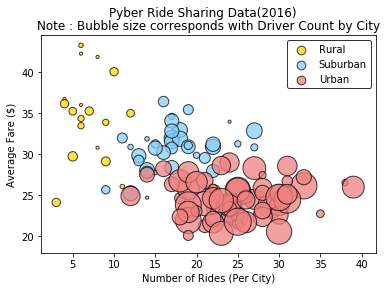

In [21]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

#group by city name
city_name = combined_data.groupby('city')

#avg fare by city
avg_fare = city_name.mean()['fare']

#rides by city
ride_count = city_name['ride_id'].count()

# number of drivers
driver_count = city_name.mean()['driver_count']

# city type
city_type = city_data.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

#separate dataframes for city types
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Rural': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Urban': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data(2016)')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note : Bubble size corresponds with Driver Count by City')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()


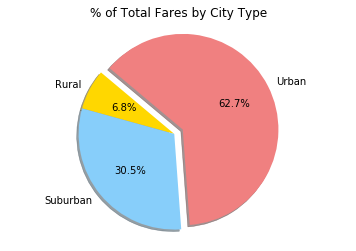

In [31]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

#group by type
type_city = combined_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_total = type_city.sum()['fare']

#pie chart build
labels = fare_total.index

#colors and explode 
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(fare_total, startangle = 140, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'none'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

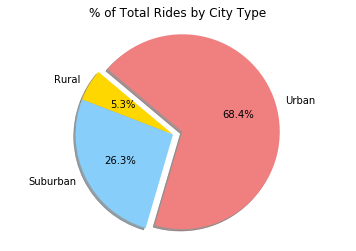

In [32]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

# number of rides per city type
ride_total = type_city.count()['ride_id']

labels = ride_total.index
plt.pie(ride_total, startangle = 140, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'none'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

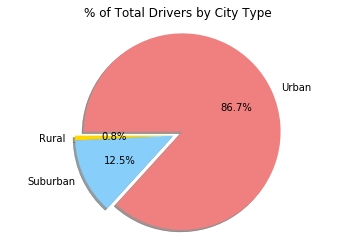

In [43]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

# number of drivers per city type
driver_total = type_city.sum()['driver_count']

labels = driver_total.index
plt.pie(driver_total, startangle = 180, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'none'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()